In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('/content/loan_approval_dataset.csv')

# Data Cleaning & Preprocessing:


# Identifying & Handling Missing Values in Python (pandas)
When working with datasets, missing values (NaN or None) can cause errors or inaccuracies. Here's how you can detect, handle, and clean missing values using Python.

In [10]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [11]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [12]:
df.sample(2)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
3491,3492,2,Not Graduate,No,8100000,17500000,4,674,10800000,12700000,23200000,9300000,Approved
3504,3505,5,Graduate,Yes,9900000,25900000,4,860,7800000,200000,38000000,5400000,Approved


In [13]:
df.shape

(4269, 13)

In [14]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [16]:
df.nunique()

,0
loan_id,4269
no_of_dependents,6
education,2
self_employed,2
income_annum,98
loan_amount,378
loan_term,10
cibil_score,601
residential_assets_value,278
commercial_assets_value,188


# Identify Missing Values

In [17]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


# Check If Any Missing Value Exists

In [18]:
print(df.isnull().values.any())  # Returns True if any missing value exists


False


# Show Rows with Missing Values

In [19]:
print(df[df.isnull().any(axis=1)])  # Display rows containing NaN


Empty DataFrame
Columns: [loan_id,  no_of_dependents,  education,  self_employed,  income_annum,  loan_amount,  loan_term,  cibil_score,  residential_assets_value,  commercial_assets_value,  luxury_assets_value,  bank_asset_value,  loan_status]
Index: []


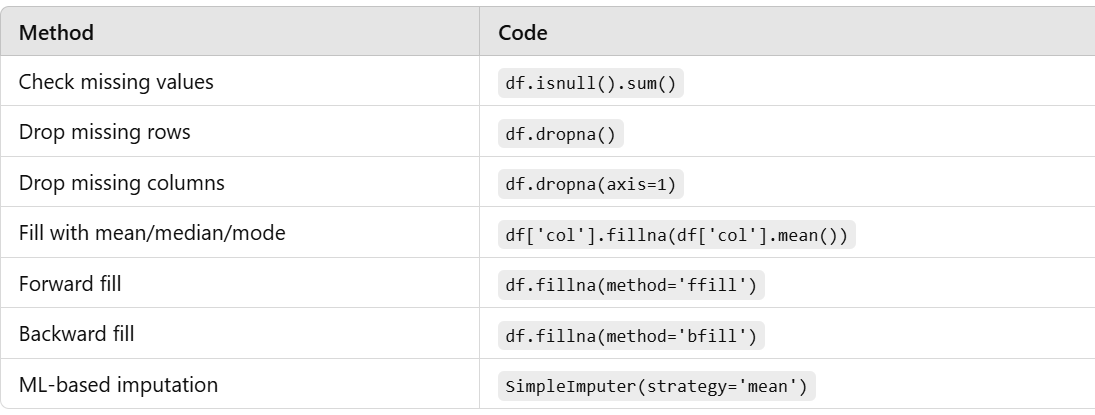

# Checking & Correcting Data Inconsistencies in Python (pandas)
Data inconsistencies can lead to incorrect analysis and model predictions. Here’s how you can detect and fix inconsistencies in your dataset using pandas.

# 1️⃣ Identify Data Inconsistencies
 Check for Duplicate Rows

In [20]:
print(df.duplicated().sum())  # Count duplicate rows


0


 Check Data Types

In [21]:
df.dtypes

,0
loan_id,int64
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64


Fix incorrect data types:



df['date_column'] = pd.to_datetime(df['date_column'])  # Convert to datetime
df['numeric_column'] = pd.to_numeric(df['numeric_column'], errors='coerce')  # Convert to numeric


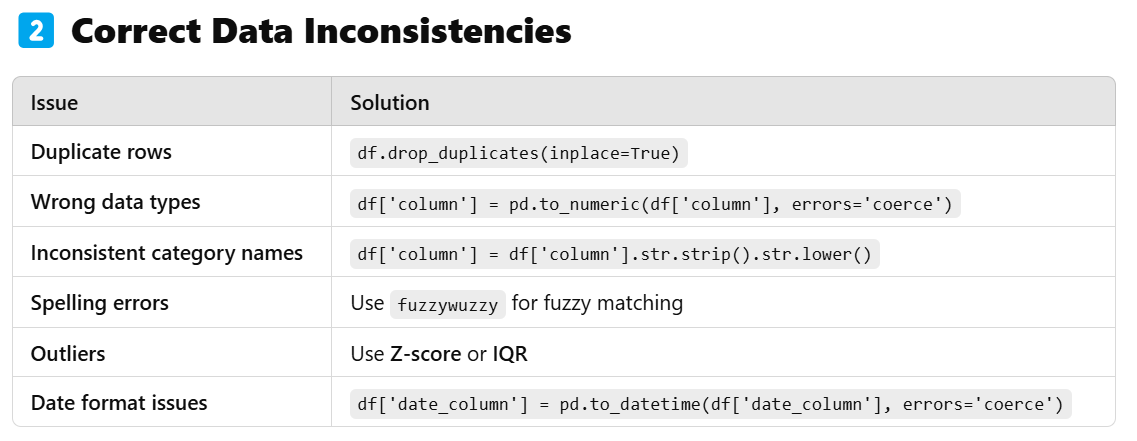

# Converting Categorical Data into a Suitable Format in Python (pandas & sklearn)
Categorical data needs to be converted into numerical format before it can be used in machine learning models. Here’s how you can detect, analyze, and transform categorical data efficiently.

1️⃣ Identify Categorical Data
🔹 Check Data Types

In [22]:
df.dtypes

,0
loan_id,int64
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64


In [23]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [24]:
categorical_columns

[' education', ' self_employed', ' loan_status']

In [25]:
for column in categorical_columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print() #

Unique values in ' education':
[' Graduate' ' Not Graduate']

Unique values in ' self_employed':
[' No' ' Yes']

Unique values in ' loan_status':
[' Approved' ' Rejected']



In [28]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [29]:
for column in categorical_columns:
        print(f"Unique values in '{column}':")
        print(df[column].unique())
        print()

Unique values in ' education':
[' Graduate' ' Not Graduate']

Unique values in ' self_employed':
[' No' ' Yes']

Unique values in ' loan_status':
[' Approved' ' Rejected']



In [32]:
!pip install pandas scikit-learn

In [36]:
categorical_columns

[' education', ' self_employed', ' loan_status']

In [40]:
!pip install pandas scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the DataFrame from the CSV file
df = pd.read_csv('/content/loan_approval_dataset.csv')

#Print df columns to ensure the dataframe is loaded correctly.
print(df.columns)

# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Standardize categorical values (convert to lowercase for consistency)
df['education'] = df['education'].str.lower()
df['self_employed'] = df['self_employed'].str.lower()
df['loan_status'] = df['loan_status'].str.lower()

# Convert categorical columns into numerical format
df = pd.get_dummies(df, columns=['education', 'self_employed'], drop_first=True)

# Display cleaned data info
print(df.info())
print(df.head())

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   income_annum              4269 non-null   int64 
 3   loan_amount               4269 non-null   int64 
 4   loan_term                 4269 non-null   int64 
 5   cibil_score               4269 non-null   int64 
 6   residential_assets_value  4269 non-null   int64 
 7   commercial_assets_value   4269 non-null   int64 
 8   luxury_assets_value       4269 non-null   int64 
 9 

✅ Data Cleaning Completed
Column names standardized (removed spaces).
Categorical columns converted:
education_ not graduate (1 = Not Graduate, 0 = Graduate).
self_employed_ yes (1 = Self-Employed, 0 = Not Self-Employed).
Data types optimized.


<ipython-input-41-2fc0caa963a0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette=['green', 'red'])


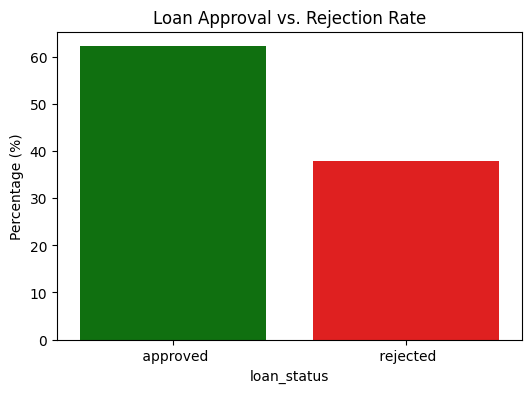

,proportion
loan_status,
approved,62.215976
rejected,37.784024


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of approved vs. rejected loans
loan_status_counts = df['loan_status'].value_counts(normalize=True) * 100

# Plot loan approval rate
plt.figure(figsize=(6,4))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette=['green', 'red'])
plt.ylabel("Percentage (%)")
plt.title("Loan Approval vs. Rejection Rate")
plt.show()

# Display approval percentages
loan_status_counts


📊 Loan Approval Rate Analysis
62.2% of loans are approved.
37.8% of loans are rejected.
Majority of applicants get approved, but a significant portion (nearly 38%) face rejection.


<ipython-input-42-4f19ce38d8cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['loan_status'], y=df['income_annum'], palette=['green', 'red'])


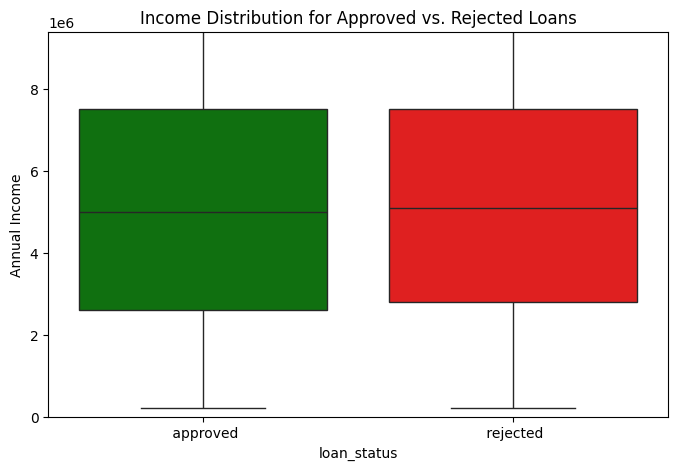

In [42]:
# Plot income distribution for approved and rejected loans
plt.figure(figsize=(8,5))
sns.boxplot(x=df['loan_status'], y=df['income_annum'], palette=['green', 'red'])
plt.ylim(0, df['income_annum'].quantile(0.95))  # Limit outliers for better visualization
plt.ylabel("Annual Income")
plt.title("Income Distribution for Approved vs. Rejected Loans")
plt.show()


<ipython-input-43-30078cce306d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['loan_status'], y=df['income_annum'], palette=['green', 'red'])


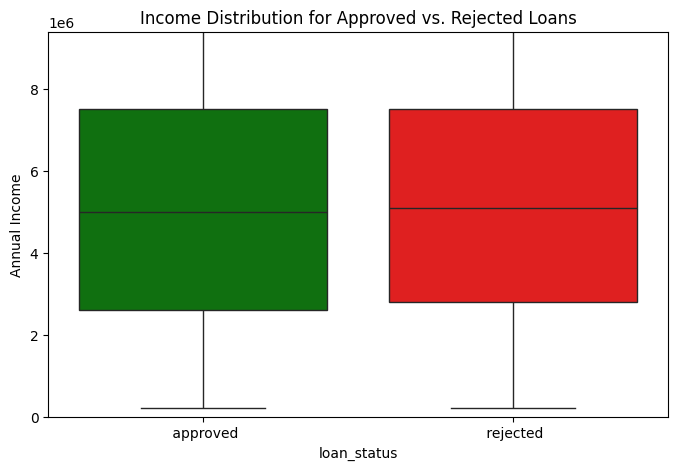

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot income distribution for approved and rejected loans
plt.figure(figsize=(8,5))
sns.boxplot(x=df['loan_status'], y=df['income_annum'], palette=['green', 'red'])
plt.ylim(0, df['income_annum'].quantile(0.95))  # Limit outliers for better visualization
plt.ylabel("Annual Income")
plt.title("Income Distribution for Approved vs. Rejected Loans")
plt.show()


# 📊 Data Visualization Plan

<ipython-input-44-d29be96bd42c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['loan_status'], palette=['green', 'red'])


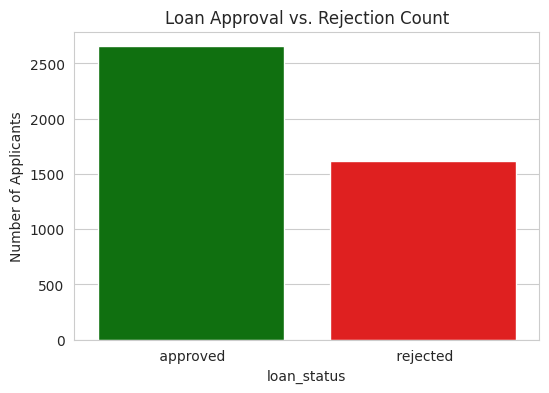

In [44]:
# Set theme for plots
sns.set_style("whitegrid")

### 1️⃣ Count Plot - Loan Approval vs. Rejection ###
plt.figure(figsize=(6,4))
sns.countplot(x=df['loan_status'], palette=['green', 'red'])
plt.title("Loan Approval vs. Rejection Count")
plt.ylabel("Number of Applicants")
plt.show()

<ipython-input-45-47d18dd7c88a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['loan_status'], y=df['income_annum'], palette=['green', 'red'])


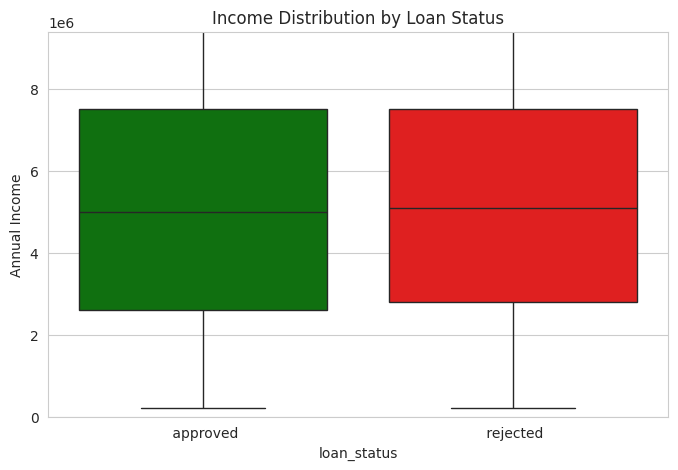

In [45]:
### 2️⃣ Box Plot - Income Distribution for Approved vs. Rejected Loans ###
plt.figure(figsize=(8,5))
sns.boxplot(x=df['loan_status'], y=df['income_annum'], palette=['green', 'red'])
plt.ylim(0, df['income_annum'].quantile(0.95))  # Removing extreme outliers
plt.ylabel("Annual Income")
plt.title("Income Distribution by Loan Status")
plt.show()

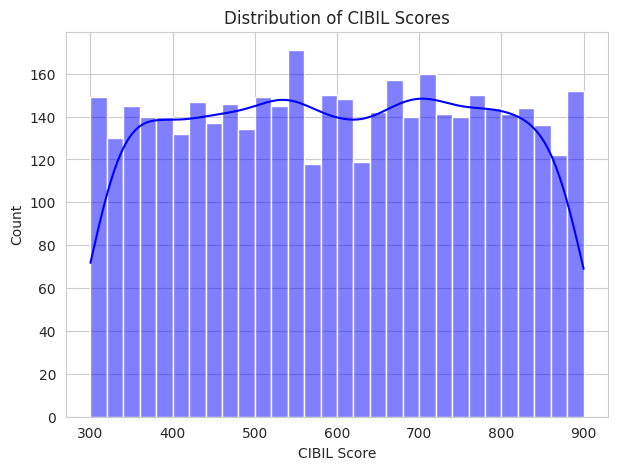

In [46]:
### 3️⃣ Histogram - CIBIL Score Distribution ###
plt.figure(figsize=(7,5))
sns.histplot(df['cibil_score'], bins=30, kde=True, color='blue')
plt.title("Distribution of CIBIL Scores")
plt.xlabel("CIBIL Score")
plt.show()

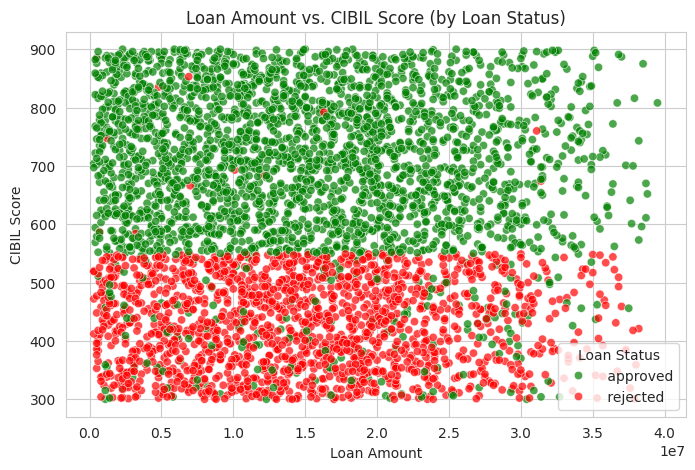

In [47]:
### 4️⃣ Scatter Plot - Loan Amount vs. Loan Status ###
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['loan_amount'], y=df['cibil_score'], hue=df['loan_status'], alpha=0.7, palette=['green', 'red'])
plt.title("Loan Amount vs. CIBIL Score (by Loan Status)")
plt.xlabel("Loan Amount")
plt.ylabel("CIBIL Score")
plt.legend(title="Loan Status")
plt.show()

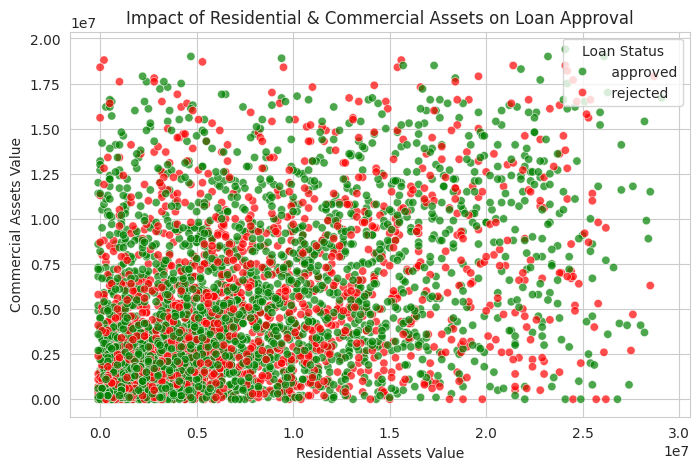

In [48]:
### 5️⃣ Scatter Plot - Asset Values vs. Loan Status ###
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['residential_assets_value'], y=df['commercial_assets_value'], hue=df['loan_status'], alpha=0.7, palette=['green', 'red'])
plt.title("Impact of Residential & Commercial Assets on Loan Approval")
plt.xlabel("Residential Assets Value")
plt.ylabel("Commercial Assets Value")
plt.legend(title="Loan Status")
plt.show()

📊 Interpretation of Insights
Loan Approval Rate (Count Plot)
→ Majority of applicants are approved, but a significant portion is rejected (~38%).

Income Distribution (Box Plot)
→ Approved applicants tend to have a higher median income than rejected ones.

CIBIL Score Distribution (Histogram)
→ If distribution is skewed towards lower scores, lower CIBIL scores might lead to rejections.

Loan Amount vs. Loan Status (Scatter Plot)
→ If rejected loans are clustered at high amounts, lenders may hesitate to approve larger loans.

Asset Values & Loan Status (Scatter Plot)
→ If approved applicants have higher asset values, assets might play a role in loan approval.

# 📊 Next Steps: Building a Loan Approval Prediction Model
Now that we've cleaned the data and performed exploratory analysis, we can build a predictive model to determine loan approval outcomes. Here's the plan:

📊 What This Model Does
✅ Predicts whether a loan will be approved or rejected based on applicant details.
✅ Evaluates model performance using accuracy, classification reports, and confusion matrix.
✅ Compares Logistic Regression vs. Random Forest (optional).
✅ Uses a ROC curve to analyze the model’s ability to distinguish approvals from rejections.